<a href="https://colab.research.google.com/github/aishwarya42/fraud_detection_classification/blob/main/fraud_detection_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("Fraud.csv",low_memory=False)

In [ ]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
new_df = df.drop(['step','nameOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud'],axis=1)

In [ ]:

import pandas as pd

nan_counts = new_df.isna().sum()  # Count NaNs in each column
print(nan_counts)

# To find the locations of NaNs:
nan_locations = new_df.isna()
print(nan_locations)  # This will show a boolean DataFrame with True where NaNs are

# To get the indices of rows with NaNs:
nan_rows = new_df[new_df.isna().any(axis=1)].index
print(nan_rows)
clean_df = new_df.dropna()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
isFraud           0
dtype: int64
          type  amount  oldbalanceOrg  newbalanceOrig  isFraud
0        False   False          False           False    False
1        False   False          False           False    False
2        False   False          False           False    False
3        False   False          False           False    False
4        False   False          False           False    False
...        ...     ...            ...             ...      ...
6362615  False   False          False           False    False
6362616  False   False          False           False    False
6362617  False   False          False           False    False
6362618  False   False          False           False    False
6362619  False   False          False           False    False

[6362620 rows x 5 columns]
Index([], dtype='int64')


In [ ]:
clean_df.head(5)
nan_counts = clean_df.isna().sum()  # Count NaNs in each column
print(nan_counts)

# To find the locations of NaNs:
nan_locations = clean_df.isna()
print(nan_locations)  # This will show a boolean DataFrame with True where NaNs are

# To get the indices of rows with NaNs:
nan_rows = clean_df[clean_df.isna().any(axis=1)].index
print(nan_rows)

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
isFraud           0
dtype: int64
          type  amount  oldbalanceOrg  newbalanceOrig  isFraud
0        False   False          False           False    False
1        False   False          False           False    False
2        False   False          False           False    False
3        False   False          False           False    False
4        False   False          False           False    False
...        ...     ...            ...             ...      ...
6362615  False   False          False           False    False
6362616  False   False          False           False    False
6362617  False   False          False           False    False
6362618  False   False          False           False    False
6362619  False   False          False           False    False

[6362620 rows x 5 columns]
Index([], dtype='int64')


In [ ]:
clean_df['type']=new_df['type'].map({'PAYMENT':1, 'TRANSFER':4, 'CASH_OUT':2, 'DEBIT':5, 'CASH_IN':3})

In [ ]:
clean_df.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,1,9839.64,170136.00,160296.36,0
1,1,1864.28,21249.00,19384.72,0
2,4,181.00,181.00,0.00,1
3,2,181.00,181.00,0.00,1
4,1,11668.14,41554.00,29885.86,0
5,1,7817.71,53860.00,46042.29,0
6,1,7107.77,183195.00,176087.23,0
7,1,7861.64,176087.23,168225.59,0
8,1,4024.36,2671.00,0.00,0
9,5,5337.77,41720.00,36382.23,0


In [ ]:
x = clean_df.iloc[:,:-1].values
y1 = clean_df.iloc[:,-1].values


In [ ]:
print(x.shape)
print(y1.shape)
print(new_df.shape)

(6362620, 4)
(6362620,)
(6362620, 5)


In [ ]:
x_train, x_test, y1_train,y1_test = train_test_split(x,y1, test_size = 0.25, random_state = 0)

In [ ]:
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve, auc
from sklearn.calibration import calibration_curve


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion = 'gini',random_state=0)

In [ ]:
classifier.fit(x_train,y1_train)

RandomForestClassifier(random_state=0)

In [ ]:
y1_train_pred  = classifier.predict(x_train)
y1_test_pred = classifier.predict(x_test)

y1_train_accuracy = accuracy_score(y1_train,y1_train_pred)
y1_val_accuracy = accuracy_score(y1_test, y1_test_pred)


In [ ]:
y1_train_accuracy = round(y1_train_accuracy)
y1_val_accuracy = round(y1_val_accuracy)
print("Training Accuracy y1:", y1_train_accuracy )
print("Validation Accuracy y1:",  y1_val_accuracy)


Training Accuracy y1: 1
Validation Accuracy y1: 1


In [ ]:
if y1_train_accuracy > y1_val_accuracy:
    print("The model may be overfitting.")
elif y1_train_accuracy < y1_val_accuracy:
    print("The model may be underfitting.")
else:
    print("The model's performance on training and validation sets for y1 class are similar")


The model's performance on training and validation sets for y1 class are similar


In [ ]:
classifier.predict(sc.transform([[1,9839.64, 170136.0,160296.36]]))

array([0])

In [ ]:
classifier.predict(sc.transform([[   4., 2806., 2806.,    0.]]))

array([1])

In [ ]:
y1_pred = classifier.predict(x_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred), 1),y1_test.reshape(len(y1_test), 1)),1))


[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y1_test,y1_pred)
accuracy*100

99.97202410327822

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588628
           1       0.90      0.87      0.89      2027

    accuracy                           1.00   1590655
   macro avg       0.95      0.94      0.94   1590655
weighted avg       1.00      1.00      1.00   1590655



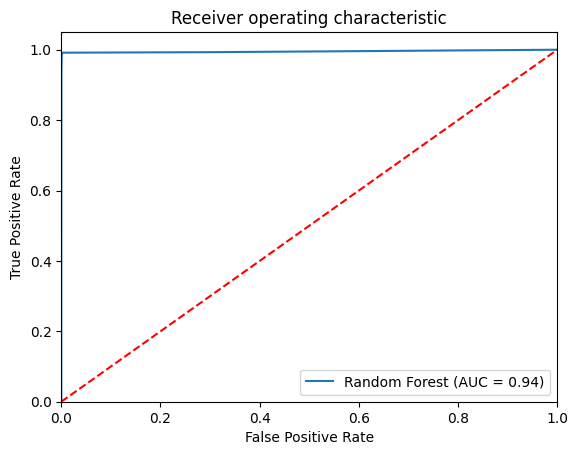

In [ ]:
logit_roc_auc = roc_auc_score(y1_test, classifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y1_test, classifier.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(logit_roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

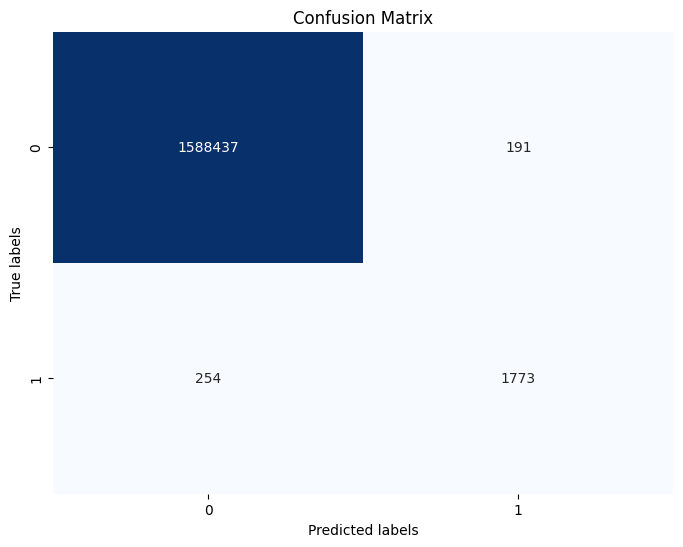

In [ ]:
cm = confusion_matrix(y1_test, y1_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

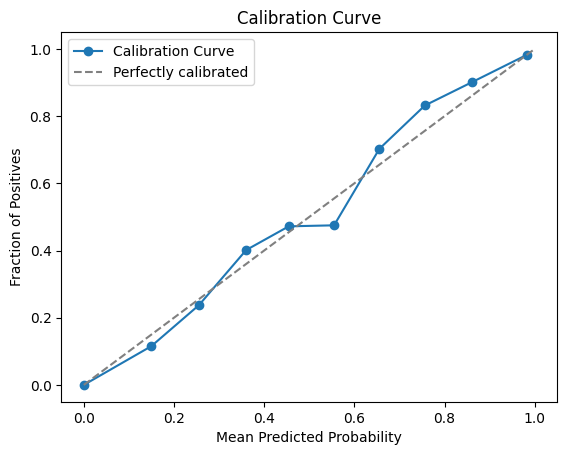

In [ ]:
probabilities = classifier.predict_proba(x_test)[:, 1]

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y1_test, probabilities, n_bins=10)

# Plot calibration curve
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()